In [17]:
from vedo import dataurl, Mesh, Sphere, show

import numpy as np
import math as mth
import os

In [19]:
# Reads the mesh data (.ply file) from a given URL location
filename = "./spider.ply"
if not os.path.isfile(filename): 
    !wget https://vedo.embl.es/examples/data/spider.ply

spider = Mesh("./spider.ply")

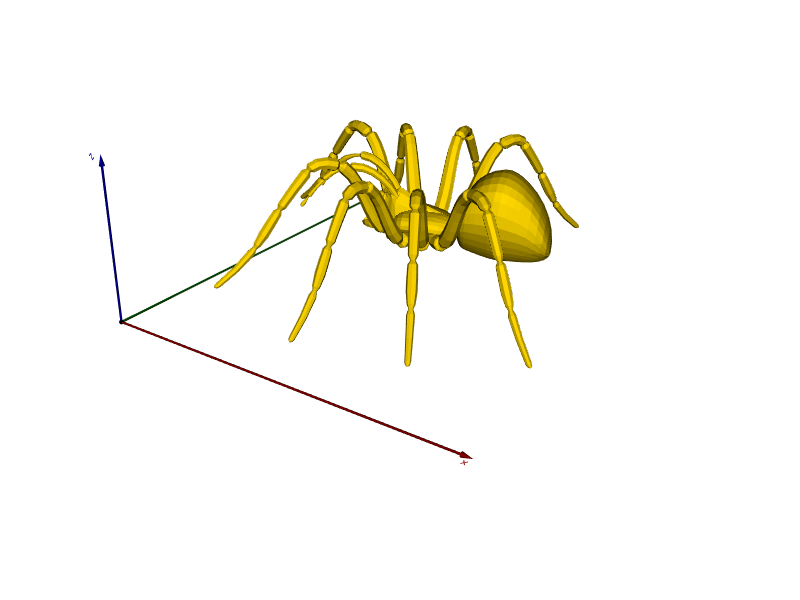

In [20]:
# Display spider with z-axis up 
show(spider, axes=2, viewup="z")#.close()

In [21]:
# Get the numpy array containing the coordinates 
# of the vertices
pts = spider.vertices

In [7]:
# Check the shape to ensure the dimensions will be correct when 
# performing matrix multiplication (transformations)
pts.shape

(4670, 3)

In [22]:
# We want a 3xN matrix so transpose matrix of points to be 3xN
pts = pts.transpose()

In [23]:
# Non Uniform Scaling transformation
S = np.array(
    [[2.0, 0.0, 0.0], 
     [0.0, 0.5, 0.0],
     [0.0, 0.0, 1.0]])

In [24]:
# Apply the transformation (matrix multiplication). We could also use @
pts1 = S @ pts
print(pts1)

[[3.61139989 3.62899995 3.64660001 ... 3.15280008 3.06340003 3.00099993]
 [1.01719999 1.02030003 1.0108     ... 1.4461     1.43990004 1.43859994]
 [1.61539996 1.58109999 1.61049998 ... 1.69920003 1.65260005 1.61049998]]



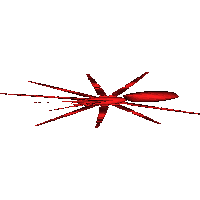

In [25]:
# Make a copy of the original shape
spider1 = spider.clone()

# Set the vertices of the new (transformed) shape
spider1.vertices = pts1.transpose()

# Change the color to red
spider1.c("red")

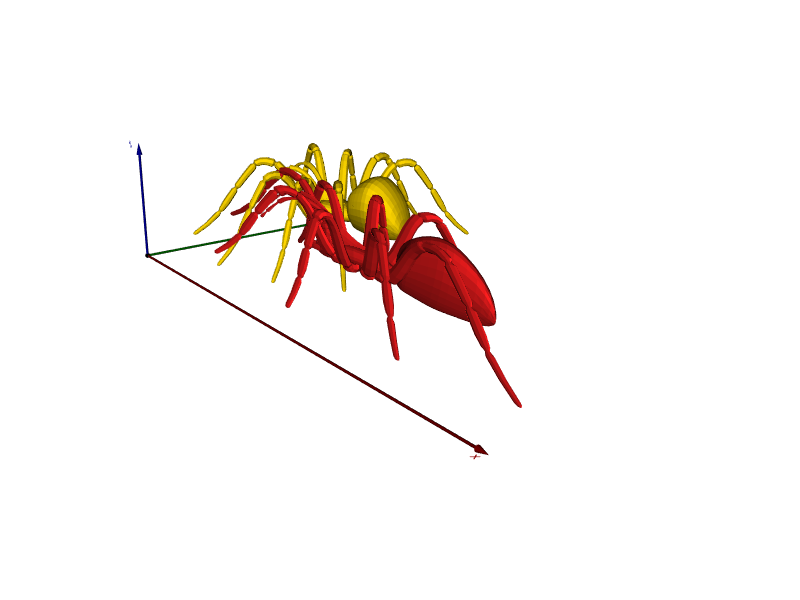

In [26]:
show(spider,spider1, axes=2, viewup="z", title="Non-uniform scaling")#.close()